# Feature extraction

# Step1
import dependencies

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn
import string
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

import sklearn.gaussian_process.kernels as kernels

from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from scipy.stats import expon

/chalmers/users/filipgr/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Step2
load the payloads into memory

In [2]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(30))

,payload,is_malicious,injection_type
index,,,
0,37662577P,0.0,LEGAL
1,shirting,0.0,LEGAL
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS
3,obeying,0.0,LEGAL
4,dictating,0.0,LEGAL
5,lafleur,0.0,LEGAL
6,capturers,0.0,LEGAL
7,8nca58z48,0.0,LEGAL
8,autocratic,0.0,LEGAL


# Step3
feature engineering

In [3]:
def plot_feature_distribution(features):
    print('Properties of feature: ' + features.name)
    print(features.describe())
    f, ax = plt.subplots(1, figsize=(10, 6))
    ax.hist(features, bins=features.max()-features.min()+1, normed=1)
    ax.set_xlabel('value')
    ax.set_ylabel('fraction')
    
    plt.show()

,payload,is_malicious,injection_type,example
index,,,,
0,37662577P,0.0,LEGAL,1
1,shirting,0.0,LEGAL,1
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1
3,obeying,0.0,LEGAL,1
4,dictating,0.0,LEGAL,1


Properties of feature: example
count    110357.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: example, dtype: float64


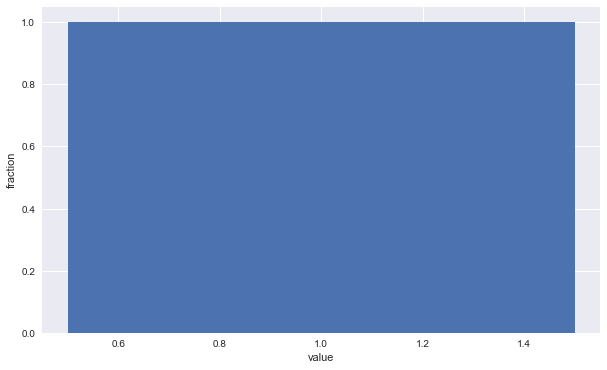

In [4]:
def create_feature_example(payloads):
    '''small description
    
    longer description
    '''
    
    payloads['example'] = [1 for row in payloads['payload']]
    return payloads

payloads = create_feature_example(payloads)
display(payloads.head())

plot_feature_distribution(payloads['example'])

,payload,is_malicious,injection_type,example,length
index,,,,,
0,37662577P,0.0,LEGAL,1,9
1,shirting,0.0,LEGAL,1,8
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31
3,obeying,0.0,LEGAL,1,7
4,dictating,0.0,LEGAL,1,9


Properties of feature: length
count    110357.000000
mean         16.559638
std          32.108637
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         974.000000
Name: length, dtype: float64


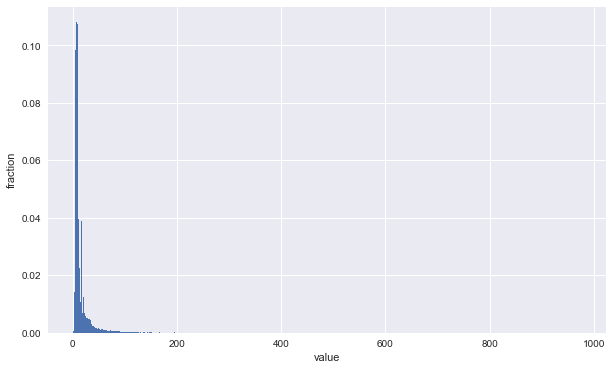

In [5]:
def create_feature_length(payloads):
    '''
        Feature describing the lengh of the input
    '''
    
    
    payloads['length'] = [len(str(row)) for row in payloads['payload']]
    return payloads


payloads = create_feature_length(payloads)
display(payloads.head())


plot_feature_distribution(payloads['length'])


,payload,is_malicious,injection_type,example,length,non-printable
index,,,,,,
0,37662577P,0.0,LEGAL,1,9,0
1,shirting,0.0,LEGAL,1,8,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0
3,obeying,0.0,LEGAL,1,7,0
4,dictating,0.0,LEGAL,1,9,0


Properties of feature: non-printable
count    110357.000000
mean          0.007412
std           0.216736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: non-printable, dtype: float64


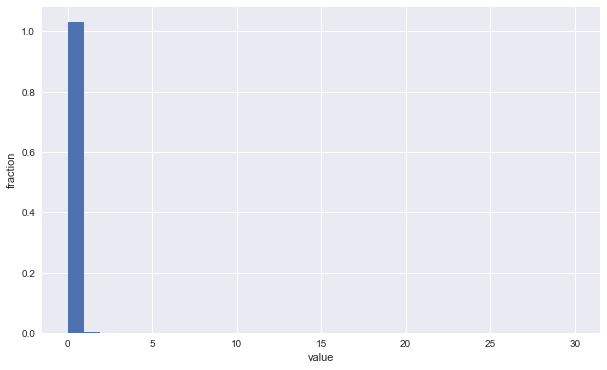

In [6]:
def create_feature_non_printable_characters(payloads):  
    '''
    Feature
    Number of non printable characthers within payload
    '''
    
    payloads['non-printable'] = [ len([1 for letter in str(row) if letter not in string.printable]) for row in payloads['payload']]
    return payloads
    

create_feature_non_printable_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['non-printable'])


,payload,is_malicious,injection_type,example,length,non-printable,punctuation
index,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0
1,shirting,0.0,LEGAL,1,8,0,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11
3,obeying,0.0,LEGAL,1,7,0,0
4,dictating,0.0,LEGAL,1,9,0,0


Properties of feature: punctuation
count    110357.000000
mean          2.363729
std           9.771260
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         538.000000
Name: punctuation, dtype: float64


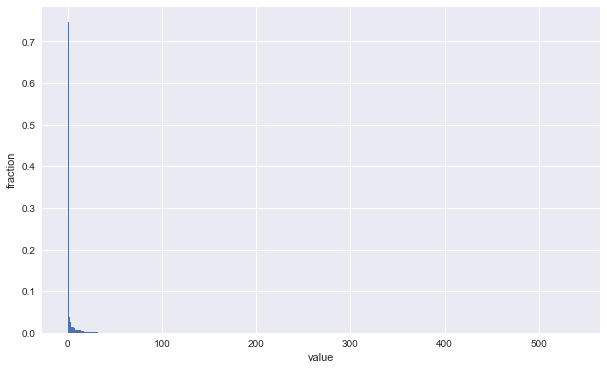

In [7]:
def create_feature_punctuation_characters(payloads):
    '''
    Feature
    Number of punctuation characthers within payload
    '''
    
    payloads['punctuation'] = [ len([1 for letter in str(row) if letter in string.punctuation]) for row in payloads['payload']]
    return payloads
    

create_feature_punctuation_characters(payloads)
display(payloads.head())
    
plot_feature_distribution(payloads['punctuation'])

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte
index,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50
1,shirting,0.0,LEGAL,1,8,0,0,103
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37
3,obeying,0.0,LEGAL,1,7,0,0,98
4,dictating,0.0,LEGAL,1,9,0,0,97


Properties of feature: min-byte
count    110357.000000
mean         71.225849
std          26.545900
min           9.000000
25%          48.000000
50%          75.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64


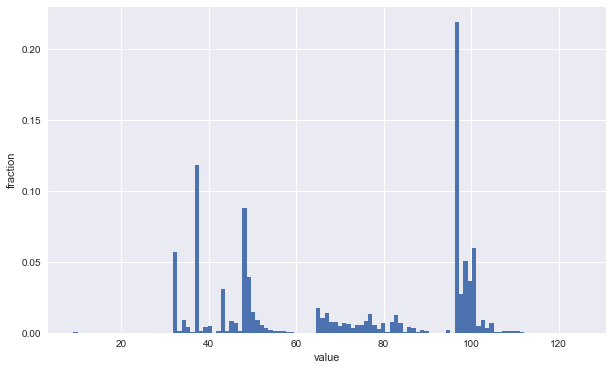

In [8]:
def create_feature_min_byte_value(payloads):
    '''
    Feature
    Minimum byte value in payload
    '''
    
    payloads['min-byte'] = [ min(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_min_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['min-byte'])

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte,max-byte
index,,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50,80
1,shirting,0.0,LEGAL,1,8,0,0,103,116
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37,119
3,obeying,0.0,LEGAL,1,7,0,0,98,121
4,dictating,0.0,LEGAL,1,9,0,0,97,116


Properties of feature: max-byte
count    110357.000000
mean        109.495229
std          20.327697
min          33.000000
25%         114.000000
50%         116.000000
75%         118.000000
max         240.000000
Name: max-byte, dtype: float64


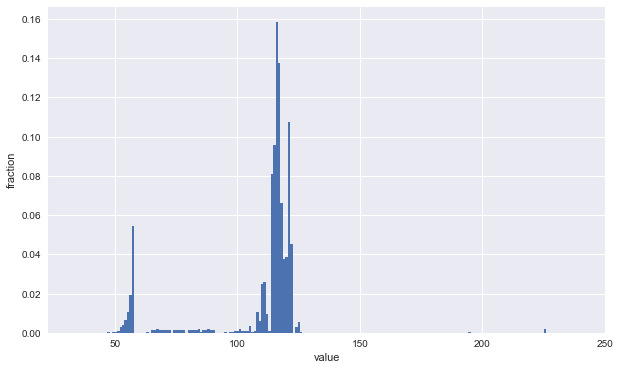

In [9]:
def create_feature_max_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['max-byte'] = [ max(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_max_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['max-byte'])

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte,max-byte,mean-byte
index,,,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50,80,56.333333
1,shirting,0.0,LEGAL,1,8,0,0,103,116,109.000000
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37,119,65.806452
3,obeying,0.0,LEGAL,1,7,0,0,98,121,107.000000
4,dictating,0.0,LEGAL,1,9,0,0,97,116,105.666667


Properties of feature: mean-byte
count    110357.000000
mean         92.514086
std          19.323081
min          33.000000
25%          83.000000
50%         101.000000
75%         107.000000
max         164.000000
Name: mean-byte, dtype: float64


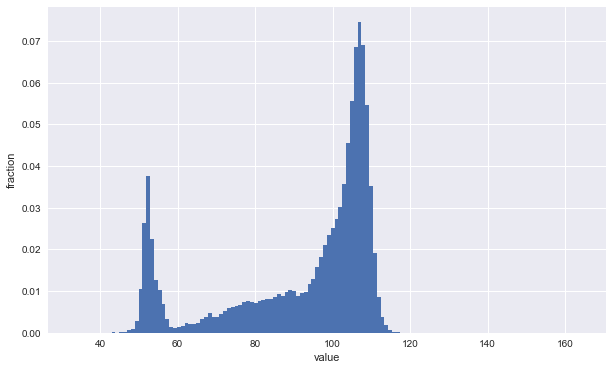

In [10]:
def create_feature_mean_byte_value(payloads):
    '''
    Feature
    Maximum byte value in payload
    '''
    
    payloads['mean-byte'] = [ np.mean(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_mean_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['mean-byte'].astype(int))

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte
index,,,,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50,80,56.333333,8.537499
1,shirting,0.0,LEGAL,1,8,0,0,103,116,109.000000,5.049752
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37,119,65.806452,26.617263
3,obeying,0.0,LEGAL,1,7,0,0,98,121,107.000000,7.151423
4,dictating,0.0,LEGAL,1,9,0,0,97,116,105.666667,6.599663


Properties of feature: std-byte
count    110357.000000
mean         12.155649
std           9.201210
min           0.000000
25%           5.000000
50%           7.000000
75%          20.000000
max          75.000000
Name: std-byte, dtype: float64


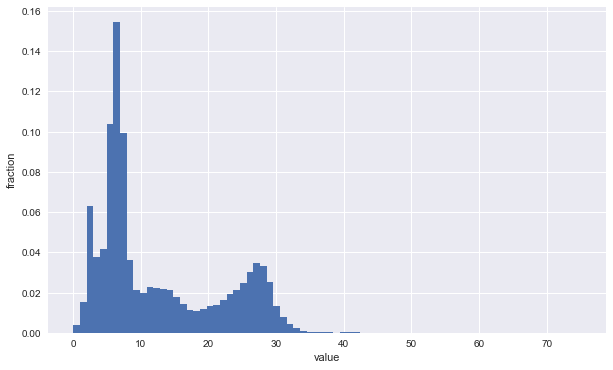

In [11]:
def create_feature_std_byte_value(payloads):
    '''
    Feature
    Standard deviation byte value in payload
    '''
    
    payloads['std-byte'] = [ np.std(bytearray(str(row), 'utf8')) for row in payloads['payload']]
    return payloads

create_feature_std_byte_value(payloads)
display(payloads.head())

plot_feature_distribution(payloads['std-byte'].astype(int))

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes
index,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50,80,56.333333,8.537499,6
1,shirting,0.0,LEGAL,1,8,0,0,103,116,109.000000,5.049752,7
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37,119,65.806452,26.617263,18
3,obeying,0.0,LEGAL,1,7,0,0,98,121,107.000000,7.151423,7
4,dictating,0.0,LEGAL,1,9,0,0,97,116,105.666667,6.599663,7


Properties of feature: distinct-bytes
count    110357.000000
mean          9.483087
std           7.410797
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          76.000000
Name: distinct-bytes, dtype: float64


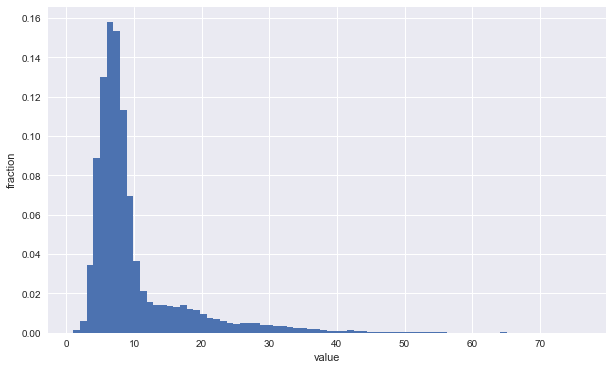

In [12]:
def create_feature_distinct_bytes(payloads):
    '''
    Feature
    Number of distinct bytes in payload
    '''
    
    payloads['distinct-bytes'] = [ len(list(set(bytearray(str(row), 'utf8')))) for row in payloads['payload']]
    return payloads

create_feature_distinct_bytes(payloads)
display(payloads.head())

plot_feature_distribution(payloads['distinct-bytes'])

pandas.core.frame.DataFrame

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes,sql-keywords
index,,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50,80,56.333333,8.537499,6,0
1,shirting,0.0,LEGAL,1,8,0,0,103,116,109.000000,5.049752,7,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37,119,65.806452,26.617263,18,0
3,obeying,0.0,LEGAL,1,7,0,0,98,121,107.000000,7.151423,7,0
4,dictating,0.0,LEGAL,1,9,0,0,97,116,105.666667,6.599663,7,0


Properties of feature: sql-keywords
count    110357.000000
mean          0.196000
std           0.671686
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: sql-keywords, dtype: float64


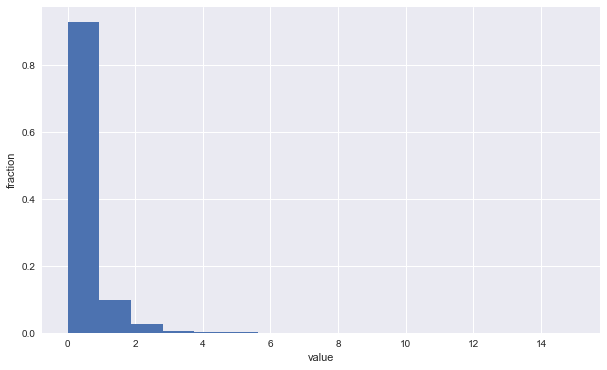

In [13]:
sql_keywords = pd.read_csv('data/SQLKeywords.txt', index_col=False)

def create_feature_sql_keywords(payloads):
    '''
    Feature
    Number of SQL keywords within payload
    '''
    
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
    

create_feature_sql_keywords(payloads)
display(type(sql_keywords))
display(payloads.head())    
plot_feature_distribution(payloads['sql-keywords'])
    
    

,payload,is_malicious,injection_type,example,length,non-printable,punctuation,min-byte,max-byte,mean-byte,std-byte,distinct-bytes,sql-keywords,js-keywords
index,,,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,1,9,0,0,50,80,56.333333,8.537499,6,0,0
1,shirting,0.0,LEGAL,1,8,0,0,103,116,109.000000,5.049752,7,0,1
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,1,31,0,11,37,119,65.806452,26.617263,18,0,1
3,obeying,0.0,LEGAL,1,7,0,0,98,121,107.000000,7.151423,7,0,1
4,dictating,0.0,LEGAL,1,9,0,0,97,116,105.666667,6.599663,7,0,1


Properties of feature: js-keywords
count    110357.000000
mean          0.354975
std           0.828371
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: js-keywords, dtype: float64


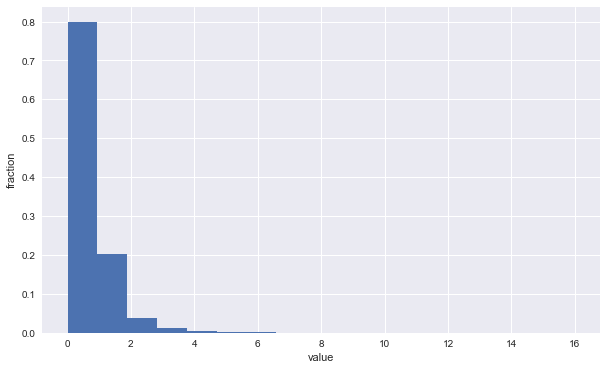

In [14]:
js_keywords = pd.read_csv('data/JavascriptKeywords.txt', index_col=False)

def create_feature_javascript_keywords(payloads):
    '''
    Feature
    Number of Javascript keywords within payload
    '''
    
    payloads['js-keywords'] = [ len([1 for keyword in js_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads
    

create_feature_javascript_keywords(payloads)
display(payloads.head())    
plot_feature_distribution(payloads['js-keywords'])
    
    

# Step3 A.2 TRANSFORMERS

In [ ]:
''class FeatureTransformer(TransformerMixin):

    def transform(self, X, **transform_params):
        #length = DataFrame(X['payload'].apply(lambda x: len(str(x))))
        #nonprintable = DataFrame(X['payload'].apply(lambda x: len([1 for letter in str(x) if letter not in string.printable])))
        
        return length, nonprintable
    

    def fit(self, X, y=None, **fit_params):
        return self''

# Step3 B
Feature engineering using bag of words techniques.  
The following vectorizers below is another way of creating features for text input.
We will test the performance of these techniques independently from our custom features in Step 3A.
We will create vectorizers of these combinations:
- 1-grams CountVectorizer
- 2-grams CountVectorizer
- 3-grams CountVectorizer
- 1-grams TfidfVectorizer
- 2-grams TfidfVectorizer
- 3-grams TfidfVectorizer

The type of N-gram function determines how the actual "words" should be created from the payload string  
Each vectorizer is used later in Step4 in Pipeline objects before training

### 1-Grams features
create a Countvectorizer and TF-IDFvectorizer that uses 1-grams.  
1-grams equals one feature for each letter/symbol recorded

In [3]:
def get1Grams(payload_obj):
    '''Divides a string into 1-grams
    
    Example: input - payload: "<script>"
             output- ["<","s","c","r","i","p","t",">"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-1):
        ngrams.append(payload[i:i+1])
    return ngrams

tfidf_vectorizer_1grams = TfidfVectorizer(tokenizer=get1Grams)
count_vectorizer_1grams = CountVectorizer(min_df=1, tokenizer=get1Grams)

### 2-Grams features
create a Countvectorizer and TF-IDFvectorizer that uses 2-grams.  

In [4]:
def get2Grams(payload_obj):
    '''Divides a string into 2-grams
    
    Example: input - payload: "<script>"
             output- ["<s","sc","cr","ri","ip","pt","t>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-2):
        ngrams.append(payload[i:i+2])
    return ngrams

tfidf_vectorizer_2grams = TfidfVectorizer(tokenizer=get2Grams)
count_vectorizer_2grams = CountVectorizer(min_df=1, tokenizer=get2Grams)

### 3-Grams features
Create a Countvectorizer and TF-IDFvectorizer that uses 3-grams

In [5]:
def get3Grams(payload_obj):
    '''Divides a string into 3-grams
    
    Example: input - payload: "<script>"
             output- ["<sc","scr","cri","rip","ipt","pt>"]
    '''
    payload = str(payload_obj)
    ngrams = []
    for i in range(0,len(payload)-3):
        ngrams.append(payload[i:i+3])
    return ngrams

tfidf_vectorizer_3grams = TfidfVectorizer(tokenizer=get3Grams)
count_vectorizer_3grams = CountVectorizer(min_df=1, tokenizer=get3Grams)

#  Step4
Model selection and evaluation

First, we will automate hyperparameter tuning and out of sample testing using train_model below

In [6]:
def train_model(clf, param_grid, X, Y):
    '''Trains and evaluates the model clf from input
    
    The function selects the best model of clf by optimizing for the validation data,
    then evaluates its performance using the out of sample test data.
    
    input - clf: the model to train
            param_grid: a dict of hyperparameters to use for optimization
            X: features
            Y: labels
    
    output - the best estimator (trained model)
             the confusion matrix from classifying the test data
    '''
    
    #First, partition into train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    n_iter = 6
    #If number of possible iterations are less than prefered number of iterations, 
    #set it to the number of possible iterations
    #number of possible iterations are not less than prefered number of iterations if any argument is expon()
    #because expon() is continous (writing 100 instead, could be any large number)
    n_iter = min(n_iter,np.prod([
        100 if type(xs) == type(expon()) 
        else len(xs) 
        for xs in param_grid.values()
    ]))
    
    #perform a grid search for the best parameters on the training data.
    #Cross validation is made to select the parameters, so the training data is actually split into
    #a new train data set and a validation data set, K number of times
    cv = ShuffleSplit(n=len(X_train), n_iter=1, test_size=0.2, random_state=0) #DEBUG: n_iter=10
    #cv = KFold(n=len(X), n_folds=10)
    random_grid_search = RandomizedSearchCV(
        clf, 
        param_distributions=param_grid,
        cv=cv, 
        scoring='f1', 
        n_iter=n_iter, #DEBUG 1 
        random_state=5,
        refit=True,
        verbose=10
    )
    
    '''Randomized search used instead. We have limited computing power
    grid_search = GridSearchCV(
        clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1', #accuracy/f1/f1_weighted all give same result?
        verbose=10,
        n_jobs=-1
    )
    grid_search.fit(X_train, Y_train)
    '''
    random_grid_search.fit(X_train, Y_train)
    
    #Evaluate the best model on the test data
    Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)
    Y_test_predicted_prob = random_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    confusion = confusion_matrix(Y_test, Y_test_predicted)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    #Calculate recall (sensitivity) from confusion matrix
    sensitivity = TP / float(TP + FN)
    
    #Calculate specificity from confusion matrix
    specificity = TN / float(TN + FP)

    #Calculate accuracy
    accuracy = (confusion[0][0] + confusion[1][1]) / (confusion.sum().sum())
    
    #Calculate axes of ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_predicted_prob)
    
    #Area under the ROC curve
    auc = roc_auc_score(Y_test, Y_test_predicted_prob)

    return {
        'conf_matrix':confusion, 
        'accuracy':accuracy, 
        'sensitivity':sensitivity,
        'specificity':specificity,
        'auc':auc,
        'params':random_grid_search.best_params_,
        'model':random_grid_search.best_estimator_,
        'roc':{'fpr':fpr,'tpr':tpr,'thresholds':thresholds}
    }


Then, we will use the train_model function to train, optimize and retrieve out of sample testing results from a range of classifiers.
These are the classifiers we will evaluate the performance on:
 - Logistic Regression
 - Support Vector Machine
 - Random forest
 - Decision Tree
 - Gaussian Naive Bayes
 - ...  
 And all their best parameters with their performance is stored in a dataframe called classifier_results

In [19]:
def create_classifier_inputs_using_vectorizers(vectorizer, subscript):
    '''make pipelines of the specified vectorizer with the classifiers to train
    
    input - vectorizer: the vectorizer to add to the pipelines
            subscript:  subscript name for the dictionary key
            
    output - A dict of inputs to use for train_model(); a pipeline and a dict of params to optimize
    '''
    
    classifier_inputs = {}
    

    classifier_inputs[subscript + ' MLPClassifier'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MLPClassifier(
            activation='relu',
            solver='adam',
            early_stopping=False,
            verbose=True
            
        ))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40]
            'clf__hidden_layer_sizes':[(1000,100)],
            'clf__alpha':[0.0005,0.001,0.01,0.1,1],
            'clf__learning_rate':['constant','invscaling'],
            'clf__learning_rate_init':[0.0005,0.001,0.01,0.1,1],
            'clf__momentum':[0,0.9],
        }
    }
    '''
    classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',MultinomialNB())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40]
        }
    }
    classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__n_estimators':[10,20,40,60]
        }
    }
    
    classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',LogisticRegression())]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':Pipeline([('vect', vectorizer), ('clf',SVC(probability=True))]),
        'dict_params': {
            'vect__min_df':[1,2,5,10,20,40],
            'clf__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'clf__gamma':[0.001, 0.0001,'auto'],
            'clf__kernel':['rbf']
        }
    }'''
    
    
    return classifier_inputs


SyntaxError: invalid syntax (<ipython-input-19-837bea73bdd1>, line 23)

In [94]:
def create_classifier_inputs(subscript):
    
    classifier_input = {}
    
    
    '''classifier_inputs[subscript + ' MultinomialNB'] = {
        'pipeline':MultinomialNB(),
        'dict_params': {
            'alpha': [1.0]
        }
    }'''
    
    '''classifier_inputs[subscript + ' Logistic'] = {
        'pipeline':LogisticRegression(),
        'dict_params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }'''
    
    '''classifier_inputs[subscript + ' RandomForest'] = {
        'pipeline':RandomForestClassifier(
            max_depth=None,min_samples_split=2, random_state=0),
        'dict_params': {
            'n_estimators':[10,20,40,60]
        }
    }'''
    
    classifier_inputs[subscript + ' SVM'] = {
        'pipeline':SVC(probability=True),
        'dict_params': {
            'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'gamma':[0.001, 0.0001,'auto'],
            'kernel':['rbf']
        }
    }
    
    return classifier_inputs

In [77]:
classifier_results = pd.DataFrame(columns=['accuracy','sensitivity','specificity','auc','conf_matrix','params','model','roc'],index=classifier_inputs.keys())

Use the 6 different feature spaces generated from the vectorizers previously above, 
and train every classifier in classifier_inputs in every feature space

In [43]:
classifier_inputs = {}
#classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_1grams,'count 1grams'))
#classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_2grams,'count 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(count_vectorizer_3grams,'count 3grams'))
#classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_1grams,'tfidf 1grams'))
#classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_2grams,'tfidf 2grams'))
classifier_inputs.update(create_classifier_inputs_using_vectorizers(tfidf_vectorizer_3grams,'tfidf 3grams'))


'''
add classifier inputs for custom features
gaussiannb
QuadraticDiscriminantAnalysis
classifier_inputs[subscript + ' GPC'] = {
        'pipeline':Pipeline([('vect', vectorizer),('clf',GaussianProcessClassifier())]),
        'dict_params': {
            'vect__min_df':[1,10],
            'clf__kernel':[
                1.0*kernels.RBF(1.0),
                1.0*kernels.Matern(),
                1.0*kernels.RationalQuadratic(),
                1.0*kernels.DotProduct()
            ]
        }
    }
'''
    
X = payloads['payload'][:30000] #DEBUG: only first 10k rows
Y = payloads['is_malicious'][:30000]

for classifier_name, inputs in classifier_inputs.items():
    display(inputs['dict_params'])
    result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
    classifier_results.loc[classifier_name] = result_dict
    


    
'''
Holmi kör en for loop här som ovan fast X = dina features och ingen pipeline
'''

#Save classifiers in a pickle file to be able to re-use them without re-training
pickle.dump( classifier_results, open( "data/trained_classifiers.p", "wb" ) )

display(classifier_results)

NameError: name 'create_classifier_inputs_using_vectorizers' is not defined

In [ ]:
classifier_inputs_custom = {}

classifier_inputs_custom.update(create_classifier_inputs('custom'))


Y = payloads['is_malicious']
display(payloads.head())
#X = create_features(payloads.copy())


for classifier_name, inputs in classifier_inputs_custom.items():
    display(inputs['dict_params'])
    result_dict = train_model(inputs['pipeline'],inputs['dict_params'],X,Y)
    classifier_results.loc[classifier_name] = result_dict

,payload,is_malicious,injection_type
index,,,
0,37662577P,0.0,LEGAL
1,shirting,0.0,LEGAL
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS
3,obeying,0.0,LEGAL
4,dictating,0.0,LEGAL


{'alpha': [1.0]}

Fitting 1 folds for each of 1 candidates, totalling 1 fits
[CV] alpha=1.0 .......................................................
[CV] ........................ alpha=1.0, score=0.679735, total=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV] C=1000 ..........................................................
[CV] ........................... C=1000, score=0.891775, total=   0.7s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ............................ C=0.1, score=0.886805, total=   0.7s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ............................. C=10, score=0.890812, total=   0.8s
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


[CV] ........................... C=0.01, score=0.883815, total=   0.4s
[CV] C=0.001 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] .......................... C=0.001, score=0.885335, total=   0.4s
[CV] C=100 ...........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s


[CV] ............................ C=100, score=0.886667, total=   0.8s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.1s finished


{'n_estimators': [10, 20, 40, 60]}

Fitting 1 folds for each of 4 candidates, totalling 4 fits
[CV] n_estimators=10 .................................................
[CV] .................. n_estimators=10, score=0.978898, total=   0.6s
[CV] n_estimators=20 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................. n_estimators=20, score=0.979862, total=   1.2s
[CV] n_estimators=40 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] .................. n_estimators=40, score=0.981830, total=   2.3s
[CV] n_estimators=60 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV] .................. n_estimators=60, score=0.980564, total=   3.8s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.8s finished


{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'gamma': [0.001, 0.0001, 'auto'],
 'kernel': ['rbf']}

Fitting 1 folds for each of 6 candidates, totalling 6 fits
[CV] kernel=rbf, gamma=auto, C=0.001 .................................


/chalmers/users/oskhol/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[CV] .. kernel=rbf, gamma=auto, C=0.001, score=0.000000, total= 6.8min
[CV] kernel=rbf, gamma=auto, C=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.5min remaining:    0.0s


[CV] .... kernel=rbf, gamma=auto, C=100, score=0.963054, total=18.6min
[CV] kernel=rbf, gamma=0.0001, C=1000 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.6min remaining:    0.0s


[CV] . kernel=rbf, gamma=0.0001, C=1000, score=0.954690, total= 1.9min
[CV] kernel=rbf, gamma=auto, C=1000 ..................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 28.5min remaining:    0.0s


[CV] ... kernel=rbf, gamma=auto, C=1000, score=0.962165, total=17.0min
[CV] kernel=rbf, gamma=0.001, C=1000 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 46.1min remaining:    0.0s


[CV] .. kernel=rbf, gamma=0.001, C=1000, score=0.968374, total= 2.3min
[CV] kernel=rbf, gamma=auto, C=0.01 ..................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 48.4min remaining:    0.0s


In [ ]:
display(classifier_results)

In [80]:
def create_features(payloads):
    features = create_feature_length(payloads)
    features = create_feature_non_printable_characters(features)
    features = create_feature_punctuation_characters(features)
    features = create_feature_max_byte_value(features)
    features = create_feature_min_byte_value(features)
    features = create_feature_mean_byte_value(features)
    features = create_feature_std_byte_value(features)
    features = create_feature_distinct_bytes(features)
    features = create_feature_sql_keywords(features)
    features = create_feature_javascript_keywords(features)
    del features['payload']
    del features['is_malicious']
    del features['injection_type']

    return features



In [7]:
#OR load classifiers from pickle if already trained
classifier_results = pickle.load( open( "data/trained_classifiers.p", "rb" ) )
display(classifier_results)


,accuracy,sensitivity,specificity,auc,conf_matrix,params,model,roc
tfidf 3grams MLPClassifier,0.991167,0.911321,0.998903,0.99301,"[[5464, 6], [47, 483]]","{'clf__momentum': 0, 'vect__min_df': 10, 'clf_...","Pipeline(steps=[('vect', TfidfVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
count 3grams MLPClassifier,0.992667,0.920755,0.999634,0.994114,"[[5468, 2], [42, 488]]","{'clf__momentum': 0, 'vect__min_df': 1, 'clf__...","Pipeline(steps=[('vect', CountVectorizer(analy...","{'fpr': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00018..."


# Step5
Visualize results. We construct a function visualize_result that can present the performance of each row from classifier_results in a visually appealing way using tables and graphs

explained variance ratio (first two components): [ 0.00579392  0.00258976]


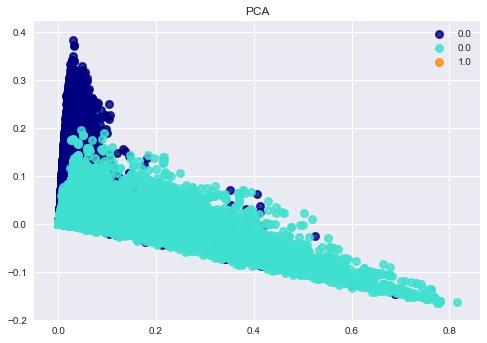

In [14]:
#PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

tfidf_vectorizer_3grams = TfidfVectorizer(tokenizer=get3Grams)

X = tfidf_vectorizer_3grams.fit_transform(payloads['payload'])
Y = payloads['is_malicious']

pca = TruncatedSVD(n_components=2)
X_r = pca.fit(X).transform(X)

#lda = LinearDiscriminantAnalysis(n_components=2)
#X_r2 = lda.fit(X, Y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, y in zip(colors, [0, 1, 2], Y):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, lw=lw,
                label=y)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.figure()
#for color, i, y in zip(colors, [0, 1, 2], Y):
#    plt.scatter(X_r2[Y == i, 0], X_r2[Y == i, 1], alpha=.8, color=color,
#                label=y)
#plt.legend(loc='best', shadow=False, scatterpoints=1)
#plt.title('LDA')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(df_row):
    
    estimator = df_row['model']
    title = 'Learning curves for classifier ' + df_row.name
    X = payloads['payload']
    Y = payloads['is_malicious']
    train_sizes = np.linspace(0.1,1.0,5)
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    
    

    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, Y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()



plot_learning_curve(classifier_results.iloc[1])

In [72]:
def visualize_result(df_row):
    '''Visualizes the results of a classifier
    
    input - df_row: a dataframe row with columns: ['accuracy','sensitivity','specificity','auc','conf_matrix','params','roc']
    '''
    
    print('Performance for classifier ' + str(df_row.name) + ' with parameters: ' + str(df_row['params']))
    print('Accuracy: \t' + str(df_row['accuracy']))
    print('Sensitivity: \t' + str(df_row['sensitivity']))
    print('Specificity: \t' + str(df_row['specificity']))
    print('AUC: \t' + str(df_row['auc']))
    
    f, (ax1, ax2) = plt.subplots(1,2)
    f.set_figheight(8)
    f.set_figwidth(15)
    
    #Subplot 1, ROC curve
    ax1.plot(df_row['roc']['fpr'], df_row['roc']['tpr'])
    ax1.set_xlim([0, 1])
    ax1.set_ylim([0, 1.0])
    ax1.set_title('ROC curve for payload classifier')
    ax1.set_xlabel('False Positive Rate (1 - Specificity)')
    ax1.set_ylabel('True Positive Rate (Sensitivity)')
    ax1.grid(True)
    
    #subplot 2, ROC curve zoomed
    ax2.plot(df_row['roc']['fpr'], df_row['roc']['tpr'])
    ax2.set_xlim([0, 0.6])
    ax2.set_ylim([0.8, 1.0])
    ax2.set_title('ROC curve for payload classifier (Zoomed)')
    ax2.set_xlabel('False Positive Rate (1 - Specificity)')
    ax2.set_ylabel('True Positive Rate (Sensitivity)')
    ax2.grid(True)
    plt.show()
    
    confusion_table = pd.DataFrame(df_row['conf_matrix'], index=['True class = 0','True class = 1'], columns=['Predicted class = 0','Predicted class = 1'])
    print('Confusion matrix:')
    display(confusion_table)

### Result Support Vectore Machine

Performance for classifier svm with parameters: {'clf__kernel': 'rbf', 'clf__C': 10, 'vect__min_df': 10}
Accuracy: 	0.981333333333
Sensitivity: 	0.798548094374
Specificity: 	0.999816480088
AUC: 	0.992037367452


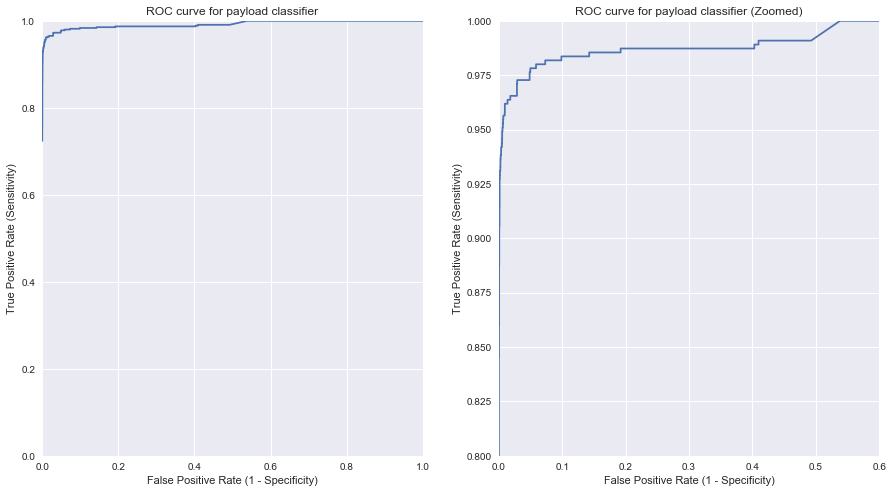

Confusion matrix:


,Predicted class = 0,Predicted class = 1
True class = 0,5448,1
True class = 1,111,440


In [75]:
visualize_result(classifier_results.iloc[1])

# (Step6)
we can display which types of queries the classifiers failed to classify. These are interesting to examine for further work on how to improve the classifier

In [38]:
pipe = Pipeline([('vect', vectorizer), ('clf',LogisticRegression(C=10))])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    
#perform a grid search for the best parameters on the training data.
#Cross validation is made to select the parameters, so the training data is actually split into
#a new train data set and a validation data set, K number of times
cv = ShuffleSplit(n=len(X_train), n_iter=1, test_size=0.2, random_state=0) #DEBUG: n_iter=10
#cv = KFold(n=len(X), n_folds=10)
random_grid_search = RandomizedSearchCV(
    pipe, 
    param_distributions={
        'clf__C':[10]
    },
    cv=cv, 
    scoring='roc_auc', 
    n_iter=1, 
    random_state=5,
    refit=True
)
random_grid_search.fit(X_train, Y_train)

#Evaluate the best model on the test data
Y_test_predicted = random_grid_search.best_estimator_.predict(X_test)


index
28660    dojo.io.script.jsonp_dojoIoScript60693._jsonpC...
17914                                      127.0.0.1 | id|
Name: payload, dtype: object

In [45]:
#Payloads classified incorrectly
pd.options.display.max_colwidth = 200
print('False positives')
print(X_test[(Y_test == 0) & (Y_test_predicted == 1)])
print('False negatives')
print(X_test[(Y_test == 1) & (Y_test_predicted == 0)])

False positives
index
28660    dojo.io.script.jsonp_dojoIoScript60693._jsonpCallback
17914                                          127.0.0.1 | id|
Name: payload, dtype: object
False negatives
index
8224                                                                                                                                                    '<'s'v'g' o'n'l'o'a'd'='a'l'e'r't'('7')' '>'
250                                                                                                                                                                b'<? popen($_REQUEST["c4"]); ?> '
9145                                                                                                                                                                       > XSS | Replacive Fuzzers
10000                                                                                                                                                                                           ;id;
9817         

In [89]:
a = {'a':1}
aa = {'b':2}
aaa = {}
aaa.update(a)
aaa.update(aa)
print(aaa)

{'a': 1, 'b': 2}
